<a href="https://colab.research.google.com/github/KrishnanandSingh/EVA/blob/master/Project-5/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

1. Change the code 8 or your own 4th Code from Assignment 4 to include: 
  - image normalization
  - L2 regularization
  - ReLU after BN

2. Run your new code for 40 epochs and save the model with highest validation accuracy
3. Find out 25 misclassified images from the validation dataset and create an image gallery

### **Import Libraries and modules**

Install keras quitely
and import it to be able to use it later

In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


import the numpy library and refer it as np
import models and layers

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

load the dataset into 2D array(X_train and x_test) representing images
and matrix for their prediction classes(y_train, y_test)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Check the dimension of X_train, it has sixty thousand images of dimension 28 by 28.

Import the pyplot module from matplotlib to visualise the 2D array representations as images.

Display the output of plotting command below the code block

(60000, 28, 28)


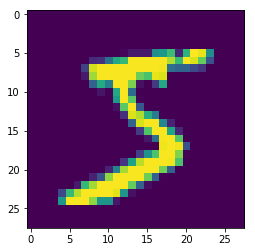

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

 Converting the greyscale image dataset to required input shape for coloured images

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

converting the values to float32 and normalising to convert them in floating values

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

last 10 values from training output

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices
e.g. converting output 5 to [0,0,0,0,1,0,0,0,0,0]
now our network can predict values for each class 

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Create the model

In [0]:
# Hyper parameters

batch_size = 128

lrate = 0.003

l2_value = 0.01

dropout = 0.0

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
train_iterator = datagen.flow(X_train, Y_train, batch_size=batch_size, shuffle=True)

test_iterator = datagen.flow(X_test, Y_test, batch_size=batch_size)

# # get a batch
# batchX, batchy = train_iterator.next()

# # pixel stats in the batch
# print(batchX.shape, batchX.mean(), batchX.std())

# # demonstrate effect on entire training dataset
# iterator = datagen.flow(X_train, Y_train, batch_size=len(X_train), shuffle=False)

# # get a batch
# batchX, batchy = iterator.next()
# # pixel stats in the batch
# print(batchX.shape, batchX.mean(), batchX.std())


Data Generator mean=0.131, std=0.308


In [12]:
from keras.layers.normalization import BatchNormalization


from keras.layers import Activation
from keras import regularizers

model = Sequential()

 
model.add(Convolution2D(32, 5, 5, kernel_regularizer=regularizers.l2(l2_value), input_shape=(28,28,1))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(10, 1, 1, kernel_regularizer=regularizers.l2(l2_value)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(dropout))


model.add(Convolution2D(32, 5, 5, kernel_regularizer=regularizers.l2(l2_value))) #8
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(BatchNormalization())

model.add(Convolution2D(20, 1, 1, kernel_regularizer=regularizers.l2(l2_value)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(dropout))


model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(l2_value)))#1
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (1, 1), kernel_regularizer=<keras.reg...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 10)        330       
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 12, 12, 10)        0         
__________

### Train the model

In [0]:
from keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import LearningRateScheduler

checkpoint_model='assignment5.hdf5'
checkpoint = ModelCheckpoint(checkpoint_model,
                             monitor='val_acc',
                             verbose=1,
                             save_weights_only=False,
                             save_best_only=True,
                             mode='max')

def lrscheduler(epoch):
  return round(lrate * 1/(1 + 0.319 * epoch), 10)


model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=lrate),
             metrics=['accuracy'])


Fitting the model with our training data to start learning.

Look at 32 images at once(batch_size), run 45 times(nb_epoch),  print output(verbose)

In [14]:
callbacklist = [checkpoint, LearningRateScheduler(lrscheduler)]

history = model.fit_generator(train_iterator,
                    steps_per_epoch=len(train_iterator),
                    epochs=40,
                    verbose=1,
                    validation_steps=len(test_iterator),
                    validation_data=test_iterator,
                    callbacks=callbacklist)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
469/469 [==============================] - 9s 19ms/step - loss: 0.5176 - acc: 0.9615 - val_loss: 0.6018 - val_acc: 0.9029

Epoch 00001: val_acc improved from -inf to 0.90290, saving model to assignment5.hdf5
Epoch 2/40
469/469 [==============================] - 6s 13ms/step - loss: 0.1724 - acc: 0.9821 - val_loss: 0.1541 - val_acc: 0.9821

Epoch 00002: val_acc improved from 0.90290 to 0.98210, saving model to assignment5.hdf5
Epoch 3/40
469/469 [==============================] - 6s 13ms/step - loss: 0.1340 - acc: 0.9840 - val_loss: 0.1518 - val_acc: 0.9746

Epoch 00003: val_acc did not improve from 0.98210
Epoch 4/40
469/469 [==============================] - 6s 13ms/step - loss: 0.1181 - acc: 0.9846 - val_loss: 0.1708 - val_acc: 0.9661

Epoch 00004: val_acc did not improve from 0.98210
Epoch 5/40
469/469 [==============================] - 6s 13ms/step - loss: 0.1063 - acc: 0.9860 - val_loss: 0.1146 - val_acc: 0.9830

Epoch 000

### Evalutate the model on validation data

calculate loss and accuracy

In [15]:
score = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=1)
print(score)

79/79 [==============================] - 0s 5ms/step
[0.038652160254120826, 0.9924]


### Display learning curve

In [0]:
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

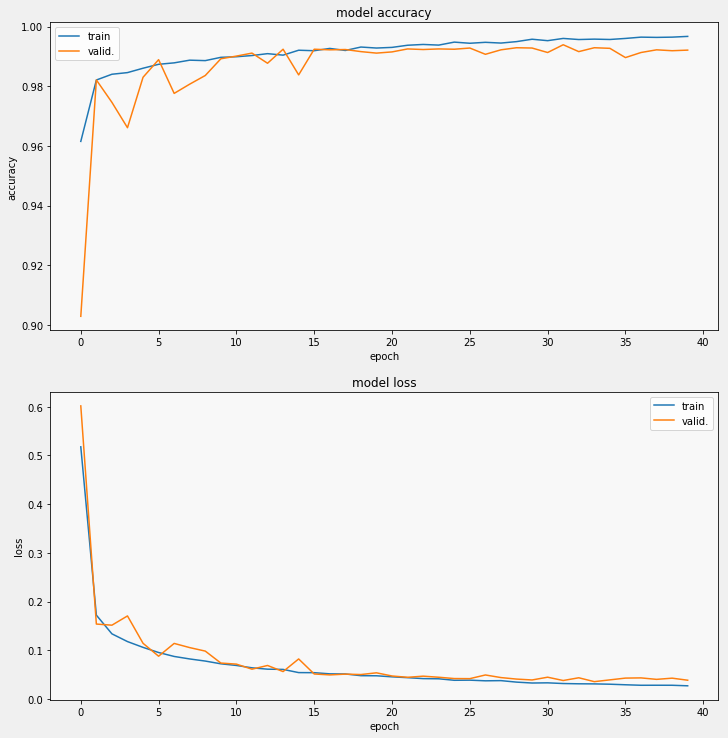

In [17]:
display_training_curves(history.history['acc'], history.history['val_acc'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

### Visualising what filters are trying to extract

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

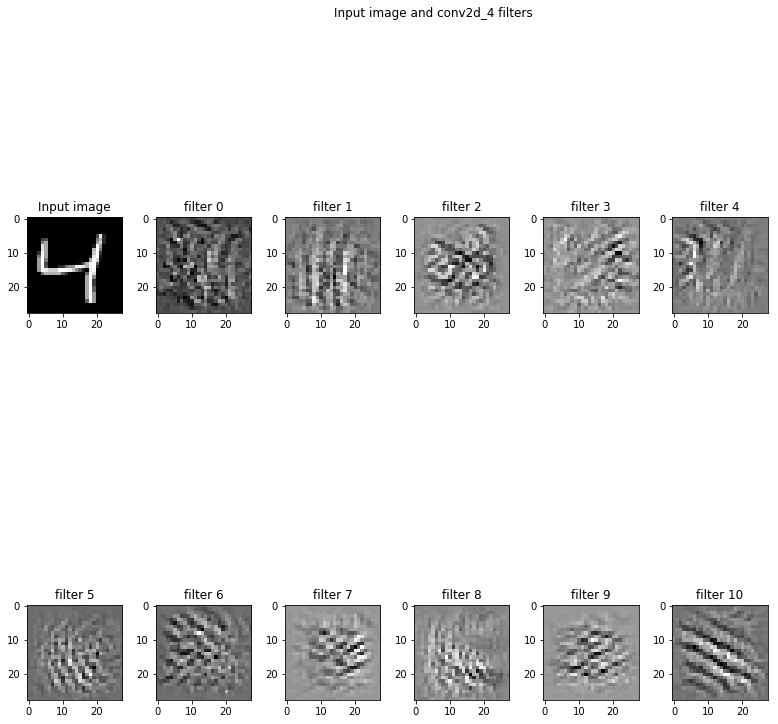

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name='conv2d_4')

### Loading model from checkpoint

Example for self reference

In [0]:
!cp assignment5.hdf5 assignment5_993.hdf5 
from google.colab import files
files.download('assignment5_993.hdf5') 

In [0]:
from google.colab import files
files.upload()
!cp assignment5_993.hdf5 assignment5.hdf5

In [0]:
!ls

In [0]:
from keras.models import load_model
model = load_model('assignment5.hdf5')

### Finding misclassified images

Since we trained the data using image normalisation, we have to test the data after image normalisation i.e. using the generator for test data. I tried using `model.predict` but was unable to get the correct expected classes for the values prediceted. So followed the basics and wrote the following code to get predicted and expected values, and also test_data in the same order.

In [21]:
predicted_list = []
expected_list = []
test_data_list = []

batch_number = 0
while batch_number < len(test_iterator):
  batch_number += 1
  test_data, expected_prediction  = test_iterator.next()
  # shape is (128, 28, 28, 1), (128, 10)
  prediction = model.predict(test_data)
  predicted = np.argmax(prediction, axis=-1)
  expected = np.argmax(expected_prediction, axis=-1)
  predicted_list.extend(predicted)
  expected_list.extend(expected)
  test_data_list.extend(test_data)

result = np.absolute(np.array(expected_list)-np.array(predicted_list))
incorrect_indices = np.nonzero(result)
print(incorrect_indices)

(array([ 145,  190,  379,  396,  446,  756,  854, 1102, 1116, 1233, 1335,
       1448, 1650, 1782, 1883, 1927, 2059, 2324, 2332, 2381, 2635, 2816,
       2985, 3031, 3071, 3132, 3315, 3376, 3525, 3588, 3816, 4080, 4182,
       4277, 4683, 4770, 5561, 5687, 5892, 5940, 6160, 6211, 6263, 6274,
       6288, 6340, 6377, 6447, 6643, 6647, 6799, 7307, 7440, 7467, 7621,
       7721, 7734, 7817, 7996, 8079, 8094, 8199, 8209, 8301, 8304, 8364,
       8501, 8537, 8808, 8825, 8947, 9301, 9400, 9524]),)


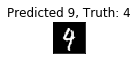

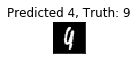

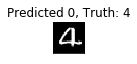

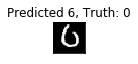

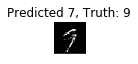

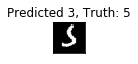

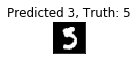

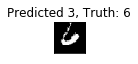

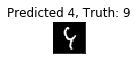

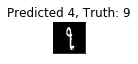

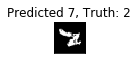

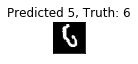

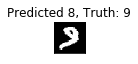

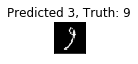

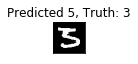

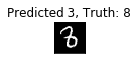

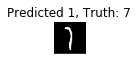

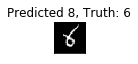

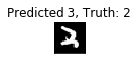

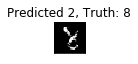

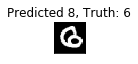

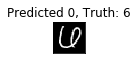

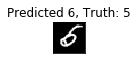

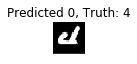

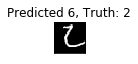

In [24]:
for i, incorrect in enumerate(incorrect_indices[0][:25]):
  plt.subplot(6,6,i+6)

  plt.imshow(test_data_list[incorrect].reshape(28,28), cmap='gray', interpolation='none')
  plt.title( "Predicted {}, Truth: {}".format(predicted_list[incorrect], expected_list[incorrect]))
  plt.xticks([])
  plt.yticks([])

  plt.show()